# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [ ]:
import pandas as pd


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



df = pd.read_csv('../input/ionosphere-data/ionosphere_data.csv')

In [ ]:
df.head()

In [ ]:
df.info()

we have 34 features, all are numerical.

# Checking Missing Values

In [ ]:
df.isnull().sum()

There is no missing data, so there is no need for handling missing data.

# Shuffling Data

Shuffling of data is important to break any bias during training, for example, without shuffling it is possible that 70% training data is 'g' and 30% is 'b' etc

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.head()

# Splitting Data

we have to split the dataset in 60-40.

In [ ]:
df.shape

In [ ]:
train_data = df.iloc[0:210, 0:-1]
train_targets = df.iloc[0:210, -1]

test_data = df.iloc[210:, 0:-1]
test_targets = df.iloc[210:, -1] 

In [ ]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

In [ ]:
train_targets.head()

# Standardize the Input Variables
Hint: Centeralized the data

By looking at the data, feature 1 and feature 2 seem to be binary features. Standardization/ Normalization has no effect on binary features.
Also, it may result in NaN values. For example, feature 2 results in NaN values afer normalization

In [ ]:
df['feature1'].value_counts()

In [ ]:
df['feature2'].value_counts()

### A little bit of feature engineering: Feature 2 has only 1 value (0), which is not very helpful in predictions. So it can be dropped.

In [ ]:
train_data.drop('feature2', inplace=True, axis=1)

## Note: We have to do the same transformations (dropping, replacing etc) on test data that we do in training data

In [ ]:
test_data.drop('feature2', inplace=True, axis=1)

In [ ]:
# if we normalize targets too then we will predict normalized values which will need inverse normalization

mean = train_data.mean()
std = train_data.std()

train_data-=mean
train_data/=std

test_data-=mean
test_data/=std


In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
train_data.mean()[0:5]

In [ ]:
train_data.std()[0:5]

# Encode labels

In [ ]:
train_targets = train_targets.map({'g':1, 'b':0})

In [ ]:
train_targets.head()

In [ ]:
test_targets = test_targets.map({'g':1, 'b':0})

In [ ]:
test_targets.head()

# Model : 1 hidden layers including 16 units

In [ ]:
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(16, input_shape=(train_data.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation Step 
(Note : Its a Binary problem , select loss , metrics according to it)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model with Epochs (100)

In [ ]:
# import numpy as np

# train_targets = np.asarray(train_targets).astype('float32').reshape((-1,1))
# test_targets = np.asarray(test_targets).astype('float32').reshape((-1,1))

In [ ]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=500)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss, 'r', label='Validation acc', linewidth=10)
plt.plot(epochs, loss, 'b--', label='Training acc', linewidth=4)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need 

# Prediction should be > 92%

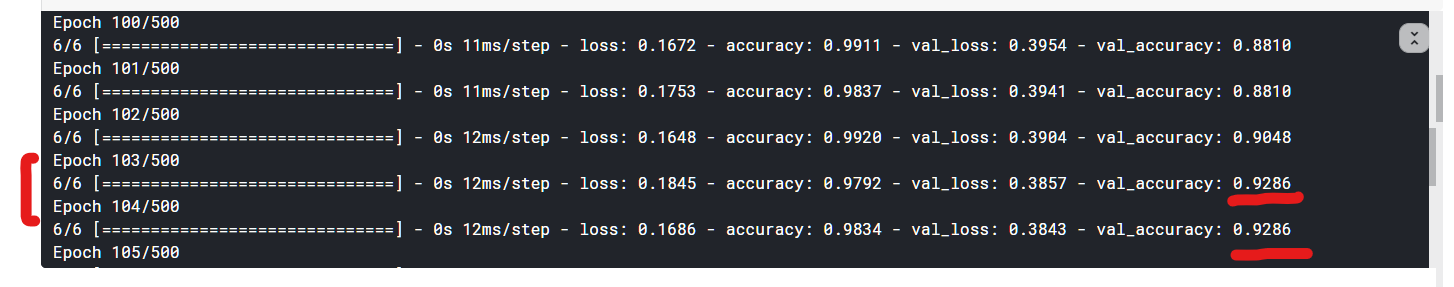

model hits 92.8% accuracy on 103 epochs

# Final Model

In [ ]:
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(16, input_shape=(train_data.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_targets, validation_split=0.2, epochs=103)

# Evaluation Step

In [ ]:
model.evaluate(test_data, test_targets)

# Prediction Step

In [ ]:
predictions = model.predict(test_data)

In [ ]:
len(predictions)

In [ ]:
import numpy as np

In [ ]:
pd.DataFrame({'Actual':test_targets, 'Predicted':np.round(predictions.reshape(141,))})